# Import Libs

In [1]:
import numpy as np                                      
import pandas as pd                                    
import seaborn as sns                                   
import matplotlib.pyplot as plt 

# Data Preparation

## Load Data

In [2]:
df = pd.read_csv('supermarket_sales.csv')
df.head().style.background_gradient(cmap='GnBu').hide_index()

Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.400000,4.761905,3.820000,9.600000
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000


In [3]:
df.shape

(1000, 17)

## Data Description

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  



*   no missing value found
*   need to merge **Date** and **Time** column, then change column type from *object* to *datetime*



In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Data Cleanup and Manipulation

In [7]:
# Merge Date and Time column
df['Date time']=df['Date'] +" "+ df['Time']

In [8]:
# Change Date time column type
df['Date time'] = pd.to_datetime(df['Date time'])
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df[['Date time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date time  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [10]:
df[['Date time']].head()

,Date time
0,2019-01-05 13:08:00
1,2019-03-08 10:29:00
2,2019-03-03 13:23:00
3,2019-01-27 20:33:00
4,2019-02-08 10:37:00


In [11]:
# Check duplicate
df['Invoice ID'].duplicated().sum()

0

In [12]:
# Check typo
for col_name in ['Branch', 'City', 'Customer type',
       'Gender', 'Product line','Payment']:
       print(df[col_name].value_counts(), '\n')

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    501
Male      499
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 



In [13]:
# Add Month column
df['Month'] = df['Date time'].dt.month

In [14]:
# Add Hour column
df['Hour'] = df['Date time'].dt.hour

In [15]:
# Add Revenue column 
df['Revenue'] = df['Unit price']*df['Quantity']

In [16]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date time,Month,Hour,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,1,13,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,3,10,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,3,13,324.31


* **cogs** column value is equal to **revenue** calculation
* **tax** column value is equal to **gross income**
* **gross margin percentage** columns are all equal
* we will use the **revenue** column instead of the **total** column

In [17]:
# Remove suspicious and unnecessary columns
df.drop(['Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income','Time'], axis=1, inplace=True)

<AxesSubplot:>

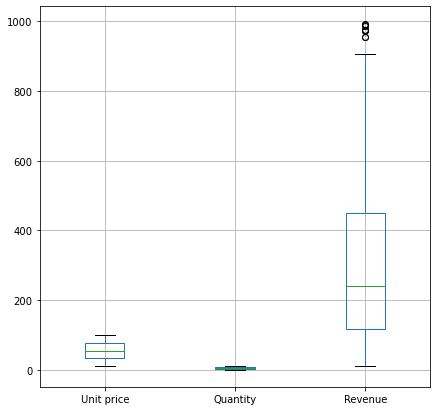

In [18]:
# Check outliers
check_col = ['Unit price','Quantity','Revenue']
df.boxplot(check_col, figsize=(7,7))

In [19]:
# Remove outliers
for x in ['Revenue']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [20]:
# Check missing value
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Payment          0
Rating           0
Date time        0
Month            0
Hour             0
Revenue          9
dtype: int64

In [21]:
# Remove missing value
df = df.dropna(axis=0)
df.shape

(991, 15)

In [22]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Payment,Rating,Date time,Month,Hour,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,Ewallet,9.1,2019-01-05 13:08:00,1,13,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,Cash,9.6,2019-03-08 10:29:00,3,10,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,Credit card,7.4,2019-03-03 13:23:00,3,13,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,Ewallet,8.4,2019-01-27 20:33:00,1,20,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,Ewallet,5.3,2019-02-08 10:37:00,2,10,604.17


# EDA

### **1. Correlation between columns**

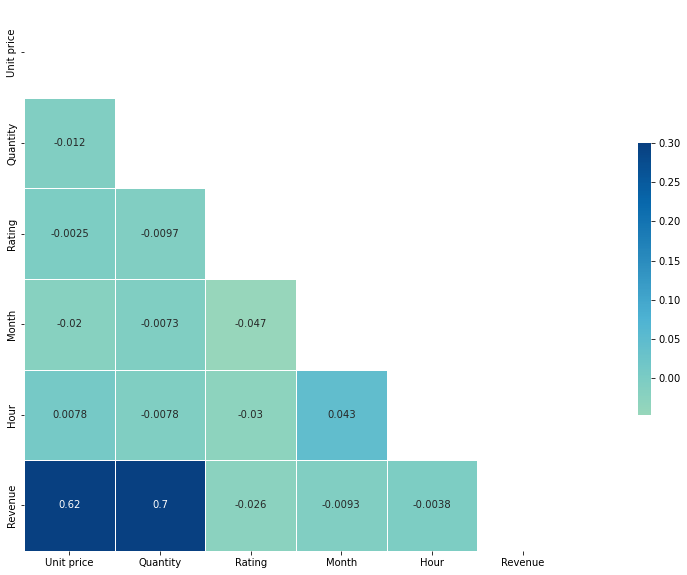

In [23]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))      
f, ax = plt.subplots(figsize=(25,10))  
sns.heatmap(corr, mask=mask, cmap='GnBu', vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

### **2. Overall daily trend**

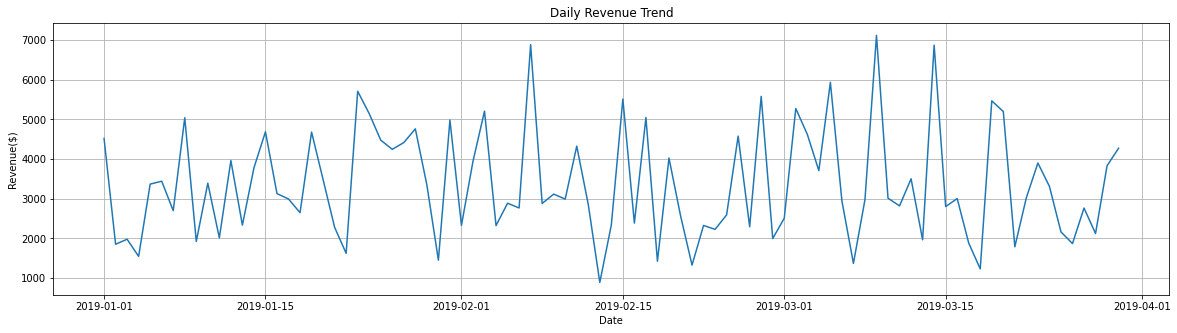

In [ ]:
daily = df.groupby('Date', as_index=False)['Revenue'].sum()

plt.figure(figsize=(20,5))
plt.plot('Date','Revenue', data=daily)
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue($)')
plt.grid()
plt.show()

### **3. Rating per product line**

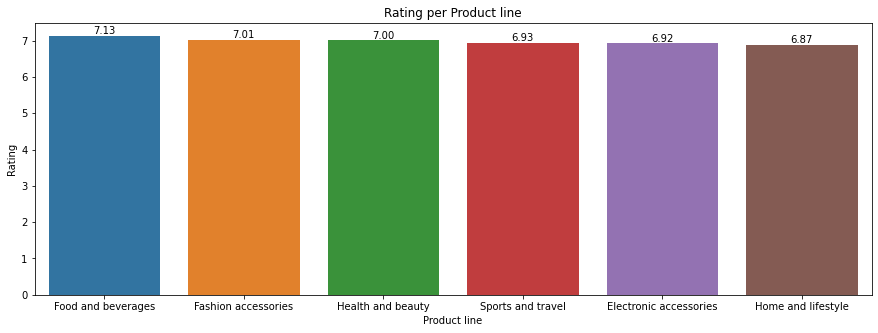

In [24]:
rate_product = df.groupby('Product line', as_index=False)['Rating'].mean()

plt.figure(figsize=(15,5))
ax = sns.barplot(x='Product line', y='Rating', data=rate_product.sort_values('Rating', ascending=False))
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Rating per Product line')
plt.show()

### **4. Which product line are not selling well?**



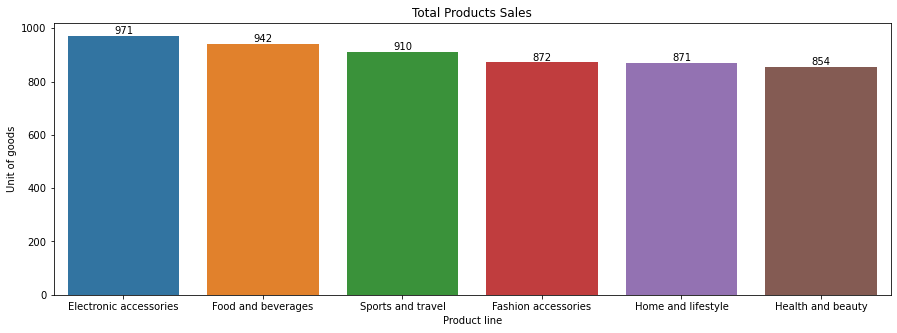

In [27]:
product = df.groupby('Product line', as_index=False)['Quantity'].sum()

plt.figure(figsize= (15,5))
ax = sns.barplot(x='Product line', y='Quantity', data=product.sort_values('Quantity', ascending=False))
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Total Products Sales')
plt.ylabel('Unit of goods')
plt.show()

### **5. Which product line are not selling well by city?**



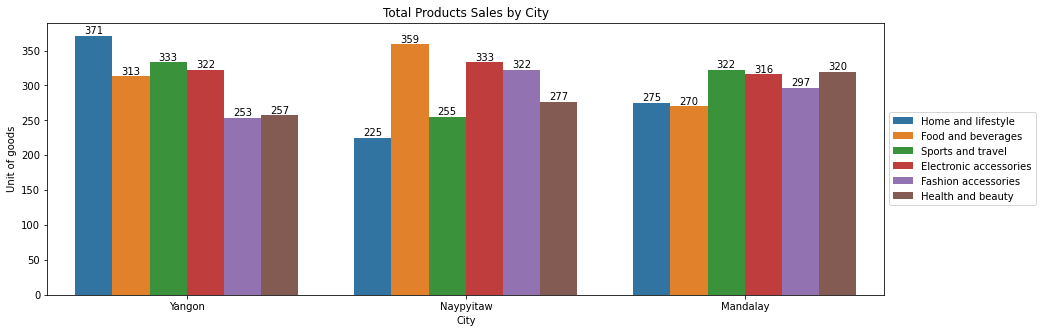

In [26]:
product_city = df.groupby(['Product line','City'], as_index=False)['Quantity'].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(x='City', y='Quantity', hue='Product line', data=product_city.sort_values('Quantity', ascending=False))
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Total Products Sales by City')
plt.ylabel('Unit of goods')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### **6. Unit price per product line**

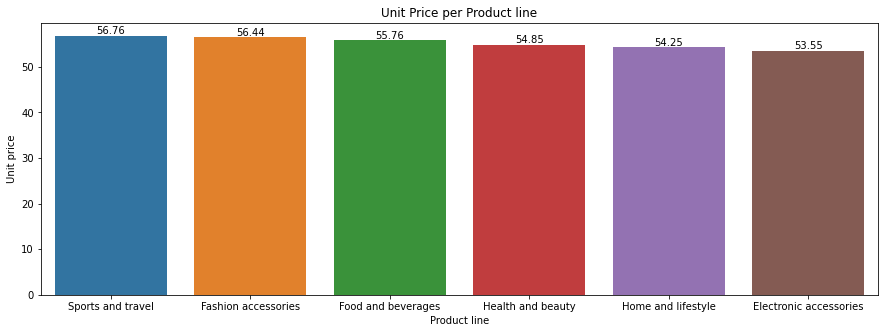

In [28]:
product_price = df.groupby('Product line', as_index=False)['Unit price'].mean()

plt.figure(figsize=(15,5))
ax = sns.barplot(x='Product line', y='Unit price', data=product_price.sort_values('Unit price', ascending=False))
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Unit Price per Product line')
plt.show()

### **7. Rating by city**



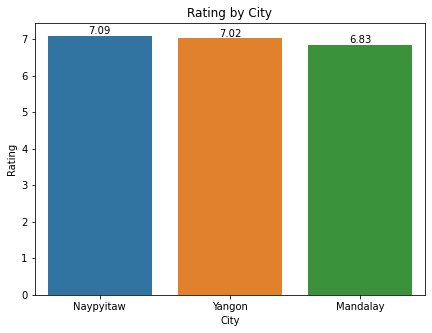

In [29]:
rate_city = df.groupby('City', as_index=False)['Rating'].mean()

plt.figure(figsize=(7,5))
ax = sns.barplot(x='City', y='Rating', data=rate_city.sort_values('Rating', ascending=False))
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Rating by City')
plt.show()

### **8. Revenue by city**

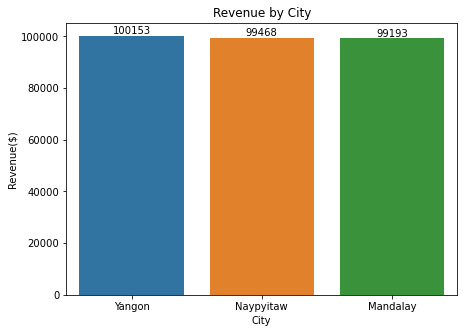

In [30]:
city_rev = df.groupby('City', as_index=False)['Revenue'].sum()

plt.figure(figsize=(7,5))
ax = sns.barplot(x='City', y='Revenue', data=city_rev.sort_values('Revenue', ascending=False))
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Revenue by City')
plt.ylabel('Revenue($)')
plt.show()

### **9. Rating by customer**

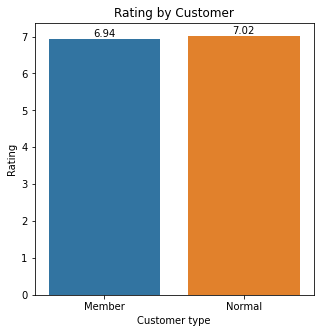

In [31]:
rate = df.groupby('Customer type', as_index=False)['Rating'].mean()

plt.figure(figsize=(5,5))
ax = sns.barplot(x='Customer type', y='Rating', data=rate)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Rating by Customer')
plt.show()

### **10. Rating distribution by customer**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5272\3813463722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_cust['Rating'] = round(rate_cust['Rating'])


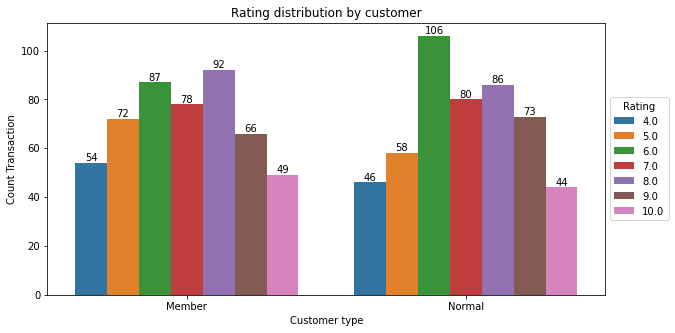

In [33]:
rate_cust = df[['Customer type','Rating','Invoice ID']]
rate_cust['Rating'] = round(rate_cust['Rating'])

rate_cust = rate_cust.groupby(['Customer type','Rating'], as_index=False)['Invoice ID'].nunique()

plt.figure(figsize=(10,5))
ax = sns.barplot(x='Customer type', y='Invoice ID', hue='Rating', data=rate_cust, ci = None)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Rating distribution by customer')
plt.ylabel('Count Transaction')
plt.legend(title='Rating', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### **11. Customer transaction**

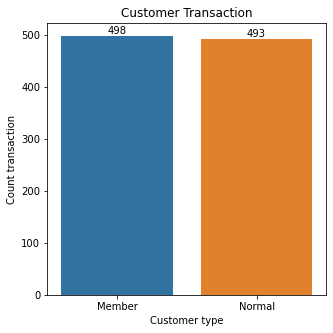

In [37]:
cust_tran = df.groupby('Customer type', as_index=False)['Invoice ID'].nunique()

plt.figure(figsize=(5,5))
ax = sns.barplot(x='Customer type', y='Invoice ID', data=cust_tran.sort_values('Invoice ID', ascending=False))
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Customer Transaction')
plt.ylabel('Count transaction')
plt.show()

### **12. Customer revenue**

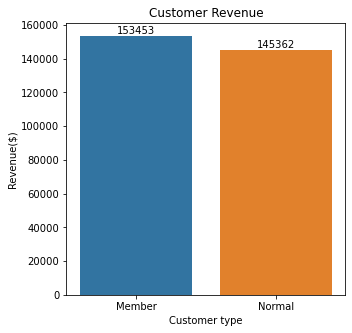

In [36]:
cust_rev = df.groupby('Customer type', as_index=False)['Revenue'].sum()

plt.figure(figsize=(5,5))
ax = sns.barplot(x='Customer type', y='Revenue', data=cust_rev.sort_values('Revenue', ascending=False))
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Customer Revenue')
plt.ylabel('Revenue($)')
plt.show()

### **13. Most customer transaction type by payment**

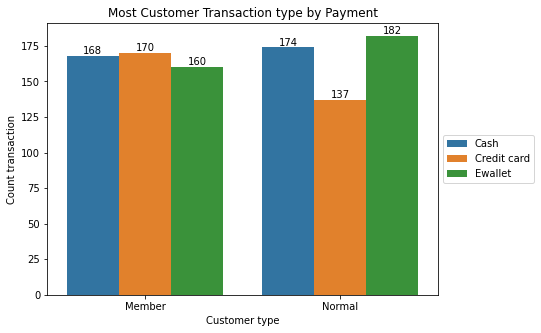

In [38]:
cust_pay = df.groupby(['Payment','Customer type'], as_index=False)['Invoice ID'].nunique()

plt.figure(2, figsize=(7, 5))
ax = sns.barplot(x='Customer type', y='Invoice ID', hue='Payment', data=cust_pay, ci = None)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center', xytext=(0, 5),textcoords='offset points')
plt.title('Most Customer Transaction type by Payment')
plt.ylabel('Count transaction')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### **14. Most shopping activity**

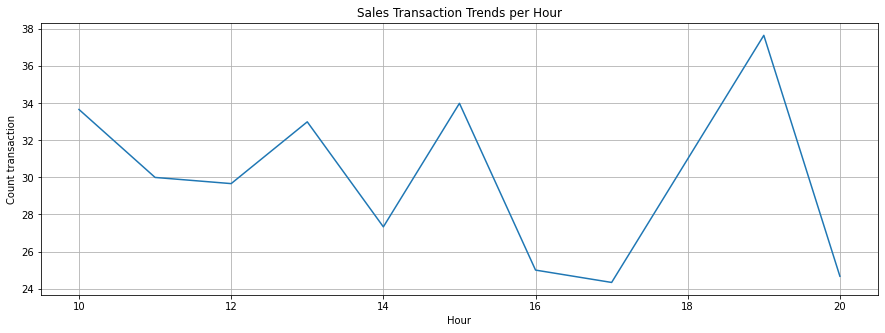

In [39]:
hour = df.groupby(['Hour','City'], as_index=False)['Invoice ID'].nunique()

plt.figure(figsize=(15,5))
sns.lineplot(x='Hour', y='Invoice ID', data=hour, ci=None)
plt.title('Sales Transaction Trends per Hour')
plt.ylabel('Count transaction')
plt.grid()
plt.show()